# Import libraries

In [ ]:
# data processing libraries
import numpy as np
import pandas as pd

In [ ]:
# plotting libraries
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
import datetime
from datetime import datetime as dt

In [ ]:
# miscellaneous
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import normalize

In [ ]:
import seaborn as sns

In [ ]:
import random

In [ ]:
import itertools

# Data exploration

## import the data

In [ ]:
# Get data

days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday']
df = {}
for day in days:
    file_path = day + '.csv'
    df[day] = pd.read_csv(file_path,sep=';')


In [ ]:
# format the data
# Make unique customer numbers throughout the week

df['monday']['customer_no'] = df['monday']['customer_no'] 
df['tuesday']['customer_no'] = df['tuesday']['customer_no'] + 2000
df['wednesday']['customer_no'] = df['wednesday']['customer_no'] + 4000
df['thursday']['customer_no'] = df['thursday']['customer_no'] + 6000
df['friday']['customer_no'] = df['friday']['customer_no'] + 8000

In [ ]:
#create a dataframe with all the days
df_full = pd.concat([df['monday'], df['tuesday'], df['wednesday'], df['thursday'], df['friday']], ignore_index=True, axis=0)

## Calculate the total number of customers in each section

In [ ]:
#a table with the the total number of customers that were in each section for all the timestamps
df_full['location'].value_counts()

checkout    7417
fruit       5122
dairy       4679
drinks      3905
spices      3754
Name: location, dtype: int64

(array([4679.,    0., 3754.,    0.,    0., 5122.,    0., 7417.,    0.,
        3905.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

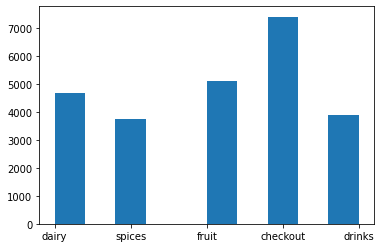

In [ ]:
#a histogram plotting the the total number of customers that were in each section for all the timestamps
plt.hist(df_full['location'])

## Calculate the total number of customers in each section over time

In [ ]:
# group by each timestamp
ts = df_full.groupby('timestamp')

In [ ]:
#create a table with a timestamp column and a column for each of the supermaket sections
df2 = df_full[0:0]
df2 = df2.drop(labels=["customer_no", "location"], axis = 1)
df2["dairy"]= np.nan
df2["spices"]= np.nan
df2["fruit"]= np.nan
df2["checkout"]= np.nan
df2["drinks"]= np.nan

df2


,timestamp,dairy,spices,fruit,checkout,drinks


In [ ]:
#fill the dataframe with the data supplied by the company 
time_unique = df_full['timestamp'].unique()
for time in time_unique:
  dairy = 0
  spices = 0
  fruit = 0
  checkout = 0
  drinks = 0
  for el in ts.get_group(time)["location"]:
    if el == "dairy":
      dairy += 1
    if el == "spices":
      spices += 1
    if el == "fruit":
      fruit += 1
    if el == "checkout":
      checkout += 1
    if el == "drinks":
      drinks += 1
  df2.loc[len(df2.index)] = [time, dairy, spices, fruit, checkout, drinks]






In [ ]:
#for each timestamp the number of customers for each supermarket section are listed in their resepctive columns
df2

,timestamp,dairy,spices,fruit,checkout,drinks
0,2019-09-02 07:03:00,2.0,0.0,0.0,0.0,0.0
1,2019-09-02 07:04:00,2.0,3.0,1.0,0.0,0.0
2,2019-09-02 07:05:00,1.0,0.0,0.0,2.0,1.0
3,2019-09-02 07:06:00,2.0,1.0,2.0,2.0,1.0
4,2019-09-02 07:07:00,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...
4358,2019-09-06 21:46:00,0.0,0.0,4.0,0.0,1.0
4359,2019-09-06 21:47:00,1.0,0.0,1.0,2.0,0.0
4360,2019-09-06 21:48:00,3.0,0.0,2.0,2.0,0.0
4361,2019-09-06 21:49:00,2.0,1.0,0.0,0.0,1.0


In [ ]:
#df_full['time'] = [datetime.datetime.time(d) for d in df_full['timestamp']]
#convert timestamp column to a datetime object and add a time column
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['time'] = df['timestamp'].dt.time
df["hour"] = df["timestamp"].dt.hour

#barplot - number of customers in each section over time
total_customers_time = pd.DataFrame(df.groupby(['hour','location'])['customer_no'].count())
total_customers_time.reset_index(inplace=True)
plot = sns.relplot(x='hour', y='customer_no', hue='location', kind='line', data=total_customers_time)
plot.fig.set_figwidth(11.7)
plot.fig.set_figheight(8.27)


KeyError: ignored

## Display the number of customers at checkout over time

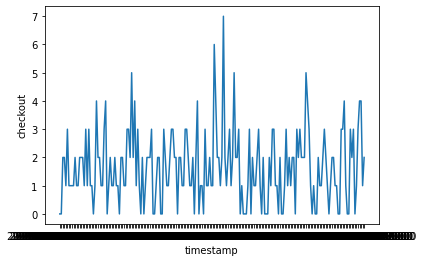

In [ ]:
#plot the number of customers at the checkout for the first 200 timestamps
sns.lineplot(x= df2["timestamp"].head(200), y = df2["checkout"].head(200))

## Calculate the time each customer spent in the market

In [ ]:
grouping = df.groupby('customer_no')['timestamp']

customer_time = grouping.apply(lambda x: int((x.max()-x.min()).total_seconds()/60))
customer_time.head()

AttributeError: ignored

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
sns.distplot(customer_time,kde=False)
None

NameError: ignored

<Figure size 1000x400 with 0 Axes>

## Total number of customers in the supermarket over time

In [ ]:
dftime.groupby('time')['customer_no'].count().plot(figsize=(20,6));

NameError: ignored

##

## Evaluate the arrival distribution of customers 

In [ ]:
#Get the time between arrivals
customer_unique2 = df['monday']["customer_no"].unique()
ts3 = df["monday"].groupby('customer_no')
arrival_times = []
for customer in customer_unique2:
  series1 = ts3.get_group(customer)["timestamp"]
  arrival_time = series1.iloc[0]
  arrival_times.append(arrival_time)
#print(arrival_times)

differences = []
while len(arrival_times)>2:
  first = datetime.datetime.strptime(arrival_times[0],"%Y-%m-%d %H:%M:%S")
  second = datetime.datetime.strptime(arrival_times[1],"%Y-%m-%d %H:%M:%S")
  #print(first)
  #print(second)
  diff = second-first
 # print(diff)
  diff = diff.total_seconds()
  if diff != 0:
    diff = diff/60
  arrival_times = arrival_times[1:]
  differences.append(diff)

differences





In [ ]:
customer_unique2 = df['monday']["customer_no"].unique()
ts3 = df["monday"].groupby('customer_no')
arrival_times = []
ls1 = df["monday"]["timestamp"].unique()
df3 = pd.DataFrame(data = ls1,  
                  columns = ["timestamp"])
df3["arrival_n"] = 0
for customer in customer_unique2:
  series1 = ts3.get_group(customer)["timestamp"]
  arrival_time = series1.iloc[0]
  for i in df3.index:
    if df3["timestamp"][i] == arrival_time:
      df3["arrival_n"][i] += 1

  #arrival_time = datetime.datetime.strptime(arrival_time,"%Y-%m-%d %H:%M:%S")

  #arrival_times.append(arrival_time)



In [ ]:
arrival_n_l = df3["arrival_n"].tolist()

In [ ]:
np.mean(differences)

0.613840830449827

(array([933., 305., 111.,  57.,  23.,   8.,   4.,   1.,   1.,   2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

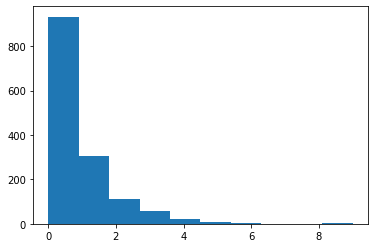

In [ ]:
plt.hist(differences)

# Calculation of behavior probabilities

## Crosstabs of aisle change

In [ ]:
#create the dataframe for the befor after data
paths = pd.DataFrame(columns=['before','after'])

In [ ]:
#fill the bevor-after table with the data supplied by the company for monday
ts2 = df_full.groupby('customer_no')
customer_unique = df_full["customer_no"].unique()
print(len(customer_unique))
counter = 0
for customer in customer_unique:
  series1 = ts2.get_group(customer)["location"]
  list_final = []
  list_index = series1.index.tolist()
  list_values = series1.tolist()
  while len(list_values) >= 2:
    diff = list_index[1] - list_index[0]
    list_final.extend([list_values[0] for i in range(diff)])
    list_index = list_index[1:]
    list_values = list_values[1:]
  list_final.append(list_values[-1])
  while len(list_final) >= 2:
    before = list_final[0]
    after = list_final[1]
    paths.loc[len(paths.index)] = [before, after]
    list_final = list_final[1:]
  counter += 1
  print("success", counter/ len(customer_unique))
  



In [ ]:

paths.to_csv()
from google.colab import files

paths.head(1000).to_csv('paths.csv', encoding = 'utf-8-sig') 
files.download('paths.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
paths.size

755104

## first choice upon arrival

In [ ]:
#get the first choice of a customer when he enters the market and append it to first_choice
ts2 = df_full.groupby('customer_no')
customer_unique = df_full["customer_no"].unique()
first_choice =[]
for customer in customer_unique:
  series1 = ts2.get_group(customer)["location"]
  print(series1)
  first_choice.append(series1.iloc[0])





In [ ]:
transition_probs = pd.crosstab(paths['after'],paths['before'], normalize=1)
transition_probs.

before,dairy,drinks,fruit,spices
after,,,,
checkout,0.388851,0.543326,0.498941,0.258552
dairy,0.000000,0.036066,0.242986,0.325633
drinks,0.227396,0.000000,0.131551,0.267881
fruit,0.185248,0.215457,0.000000,0.147934
spices,0.198504,0.205152,0.126522,0.000000


In [ ]:
transition_probs2 = pd.crosstab(paths['after'],paths['before'], normalize=1)
transition_probs2

before,dairy,drinks,fruit,spices
after,,,,
checkout,0.017012,0.035427,0.033398,0.023350
dairy,0.956125,0.001738,0.015607,0.030434
drinks,0.009739,0.933955,0.008871,0.025993
fruit,0.008414,0.014681,0.933822,0.014336
spices,0.008710,0.014199,0.008301,0.905886


In [ ]:
from google.colab import files
import pickle


serialized = pickle.dumps(transition_probs2)

#files.download('matrix.csv')

In [ ]:
with open('first_choice.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(first_choice, file)

# Monte Carlo simulation

## Create a customer class

In [ ]:
#externl variables: transition_probs, first_choice

class Customer:
  id_iter = itertools.count()

  def __init__(self, state="entry", budget = 100, transition_probs = transition_probs2):
    self.id = next(Customer.id_iter)
    self.state = state
    self.budget = budget

  def __repr__(self):
    return f'<Customer {self.id} in {self.state}>'
  
  def next_state(self):
    state_before = self.state
    checkout = transition_probs[state_before]["checkout"]
    dairy = transition_probs[state_before]["dairy"]
    drinks = transition_probs[state_before]["drinks"]
    fruit = transition_probs[state_before]["fruit"]
    spices = transition_probs[state_before]["spices"]
    sections = ["checkout","dairy","drinks", "fruit","spices"]
    probabilities = [checkout, dairy, drinks, fruit, spices]
    draw = np.random.choice(sections, 1, p=probabilities)
    draw = draw[0]
    self.state = draw

  def is_active(self):
    if self.state == "checkout":
      return False
    else:
      return True

## Create customer instances

In [ ]:
cust1 = Customer()
print(cust1)
cust1.next_state()
print(cust1)

cust2 = Customer()
print(cust2)
cust2.next_state()
print(cust2)
cust2.next_state()
print(cust2)
cust2.next_state()
print(cust2)


<Customer 0 in entry>
<Customer 0 in spices>
<Customer 1 in entry>
<Customer 1 in drinks>
<Customer 1 in spices>
<Customer 1 in dairy>


# Create a Supermarket class

In [ ]:
df["monday"]

In [ ]:
from re import I
import pandas as pd
import random

class Supermarket:
    """manages multiple Customer instances that are currently in the market.
    """
    #innitializer method
    def __init__(self):        
        # a list of Customer objects
        self.customers = []
        # minute tracker that is updated by the next_minute method
        self.minutes = 0
        #log of all the customer behavior
        self.data = pd.DataFrame(columns=['timestamp','customer_no','location'])

    @property
    def n_customer(self):
      return len(self.customers)
    
    #return the customer list when a supermrket instance is printed
    def __repr__(self):
      return f'{self.customers}'

    #return the time in an hour:minute string
    def get_time(self):
      m = self.minutes
      hours = 0
      while m >= 60:
        m = m - 60
        hours +=1
      return f'{hours}:{m}'

    #print the customers
    def print_customers(self):
      for row in self.data.iterrows():
        print(row["timestamp"],row["customer_no"],row["location"])
        

    def next_minute(self):
      time = Supermarket.get_time(self) #get the current time
      for c in self.customers:
        self.data.loc[len(self.data)] = [time, c.id, c.state] # add the current customer states to the dataframe log


      if len(self.customers) > 0:
        Supermarket.remove_existing_customers(self) #remove customers from the list that have reached the checkout
        for i in range(len(self.customers)):
          self.customers[i].next_state()  #move the customers to the next state
      Supermarket.add_new_customers(self, random.choice(arrival_n_l)) # add new customers based on the arrival distribution
      self.minutes += 1 #move the minute log to the next minute
    
    def add_new_customers(self, n):
      for i in range(n):
        self.customers.append(Customer(state=random.choice(first_choice), budget=random.randint(1, 100)))  #add customers to the list with a random budget between one and 100

    def remove_existing_customers(self):
      customers = self.customers
      self.customers = [c for c in self.customers if c.is_active()] #return a list with the inactive customers removed (customers that have reached the checkout)
    

            



In [ ]:

 sup = Supermarket()
 print(sup)
 sup.next_minute()
 print(sup)
 sup.next_minute()
 print(sup)
 sup.next_minute()
 print(sup)
 sup.next_minute()
 print(sup)
 sup.next_minute()
 print(sup)
 sup.next_minute()
 print(sup)
sup.data


[]
[<Customer 0 in spices>, <Customer 1 in fruit>, <Customer 2 in drinks>]
[<Customer 0 in dairy>, <Customer 1 in checkout>, <Customer 2 in checkout>, <Customer 3 in dairy>, <Customer 4 in fruit>, <Customer 5 in spices>]
[<Customer 0 in spices>, <Customer 3 in checkout>, <Customer 4 in spices>, <Customer 5 in drinks>, <Customer 6 in drinks>]
[<Customer 0 in dairy>, <Customer 4 in fruit>, <Customer 5 in fruit>, <Customer 6 in checkout>, <Customer 7 in spices>, <Customer 8 in dairy>]
[<Customer 0 in checkout>, <Customer 4 in dairy>, <Customer 5 in checkout>, <Customer 7 in fruit>, <Customer 8 in fruit>]
[<Customer 4 in fruit>, <Customer 7 in checkout>, <Customer 8 in drinks>, <Customer 9 in dairy>, <Customer 10 in spices>]


,timestamp,customer_no,location
0,0:1,0,spices
1,0:1,1,fruit
2,0:1,2,drinks
3,0:2,0,dairy
4,0:2,1,checkout
5,0:2,2,checkout
6,0:2,3,dairy
7,0:2,4,fruit
8,0:2,5,spices
9,0:3,0,spices


(array([ 825.,    0., 1163.,    0.,    0., 1684.,    0.,  859.,    0.,
        1052.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

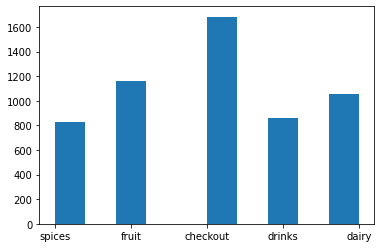

In [ ]:

sup = Supermarket()
for x in range(1000):
  sup.next_minute()
sup.data
plt.hist(sup.data['location'])

In [ ]:
counts_original = df_full['location'].value_counts()
print(counts_original / len(df_full))

checkout    0.298147
fruit       0.205893
dairy       0.188085
drinks      0.156972
spices      0.150902
Name: location, dtype: float64


In [ ]:
counts_model = sup.data['location'].value_counts()
print(counts_model / len(sup.data))

checkout    0.301630
fruit       0.208311
dairy       0.188429
drinks      0.153860
spices      0.147770
Name: location, dtype: float64
